# Занятие 1

### Пороговое отсечение

In [1]:
# import packages
import cv2
import numpy as np
import matplotlib.pyplot as plt

# function for image thresholding
def imThreshold(img, threshold, maxVal):
    assert len(img.shape) == 2 # input image has to be gray
    
    height, width = img.shape
    bi_img = np.zeros((height, width), dtype=np.uint8)
    for x in range(height):
        for y in range(width):
            if img.item(x, y) > threshold:
                bi_img.itemset((x, y), maxVal)
                
    return bi_img

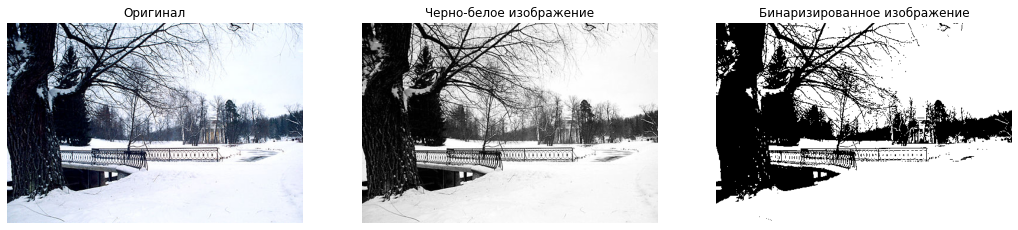

In [7]:
# read the image for local directory (same with this .ipynb) 
img = cv2.imread('SourceImages/snow.jpg')

# convert a color image to gray
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# image thresholding using global threshold
threshold = 120
img_bi = imThreshold(img_gray, 127, 255)

# Be sure to convert the color space of the image from
# BGR (Opencv) to RGB (Matplotlib) before you show a 
# color image read from OpenCV
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Оригинал')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gray, 'gray')
plt.title('Черно-белое изображение')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_bi, 'gray')
plt.title('Бинаризированное изображение')
plt.axis("off")

plt.show()

### Коррекция яркости

In [10]:
def increase_brightness(img, value=50):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

In [13]:
def plot_two_images(img0, img1):
    fig = plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img0[..., ::-1])
    plt.title('Original')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(img1[..., ::-1])
    plt.title('Result')
    plt.axis("off")

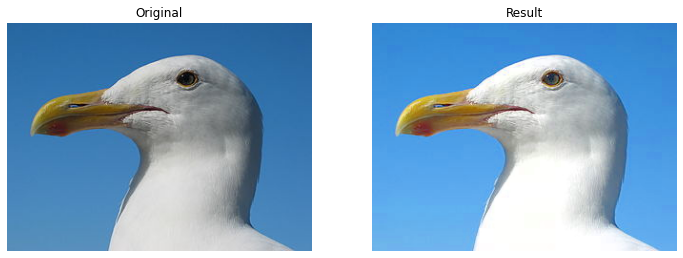

In [14]:
# Read in input images
img = cv2.imread('SourceImages/bird.jpg', cv2.IMREAD_COLOR)

output_image = increase_brightness(img, value=50)

# Plot results
plot_two_images(img, output_image)

### Коррекция яркости и контрастности
[cv2.convertScaleAbs](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga3460e9c9f37b563ab9dd550c4d8c4e7d)

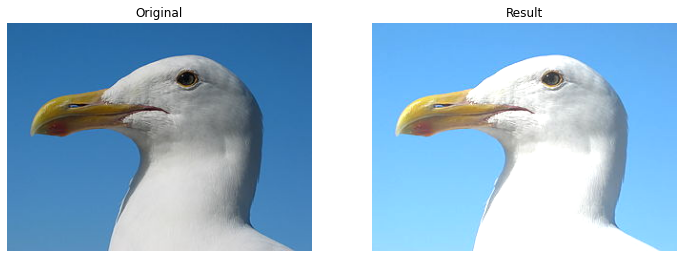

In [21]:
output_image = cv2.convertScaleAbs(img, alpha=1.2, beta=50)

# Plot results
plot_two_images(img, output_image)

### Instagram фильтры
[`pilgram`](https://github.com/akiomik/pilgram)
A python library for instagram filters.


In [22]:
from PIL import Image
import pilgram

im = Image.open('SourceImages/bird.jpg')

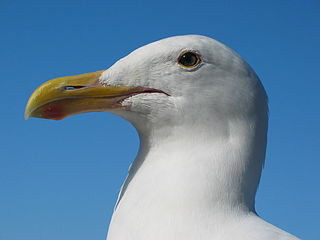

In [27]:
im

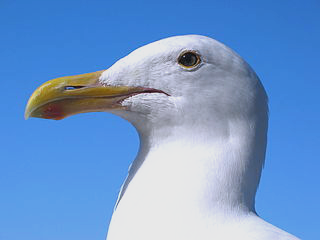

In [25]:
pilgram.lark(im)

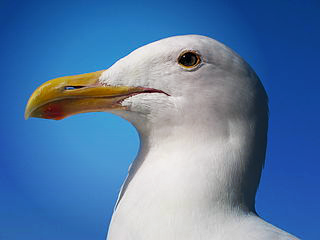

In [29]:
pilgram.mayfair(im)

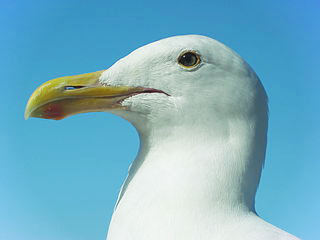

In [32]:
pilgram.brooklyn(im)